## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 12 : REINFORCEMENT LEARNING </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [1]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Christopher Darren"
myNIM = "00000054804"

In [2]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Christopher Darren
NIM: 		00000054804
Start: 		2023-05-21 15:35:02.545965
Device ID: 	61350dc4-f7b2-11ed-a642-f02f74a116e8



---

### Dataset yang dipakai:

1. Cartpole – sumber : https://www.gymlibrary.dev/environments/classic_control/cart_pole/
2. MountainCar-v01 – sumber : https://www.gymlibrary.dev/environments/classic_control/mountain_car/

---

### Hasil kerja

#### 1. Installing OpenAI gym

In [3]:
#pip install gym

  Using cached gym-0.26.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


#### 2. Import required libraries

In [2]:
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys

#### 3. Import the environment :

In [3]:
#pip install plotting --user

In [3]:
from collections import defaultdict
from windy_gridworld import WindyGridworldEnv
import plotting

matplotlib.style.use('ggplot')

#### 4. Create gym environment

In [4]:
env = WindyGridworldEnv()

#### 5. Make the -greedy policy

In [5]:
def createEpsilonGreedyPolicy (Q, epsilon, num_actions):
    def policyFunction(state):

        Action_probabilites = np.ones(num_actions,
        dtype=float) * epsilon / num_actions

        best_action = np.argmax(Q[state])
        Action_probabilites[best_action] += (1.0 - epsilon)
        return Action_probabilites
    
    return policyFunction

#### 6. Build Q-learning model

In [6]:
def qLearning(env, num_episodes, discount_factor = 1.0,
                alpha= 0.6, epsilon = 0.1):
    
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))
    

    # Create an epsilon greedy policy function
    # appropiately for environement action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, env.action_space.n)

    # For every episode
    for ith_episode in range(num_episodes):

        # Reset the environment and pick the first action
        state = env.reset()

        for t in itertools.count():

            # get probabilities of all actions from current state
            action_probabilities = policy(state)

            # choose action according to
            # the probability distribution

            action = np.random.choice(np.arange(len(
                action_probabilities)), 
                p = action_probabilities)

            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t

            # TD Update
            best_next_action = np.argmax(Q[next_state])
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state] [action]
            Q[state] [action] += alpha * td_delta

            # done is True if episode terminated
            if done:
                break

            state = next_state

    return Q, stats

#### 7. Train the model

In [7]:
Q, stats = qLearning(env, 1000)

#### 8. Plot important statistics

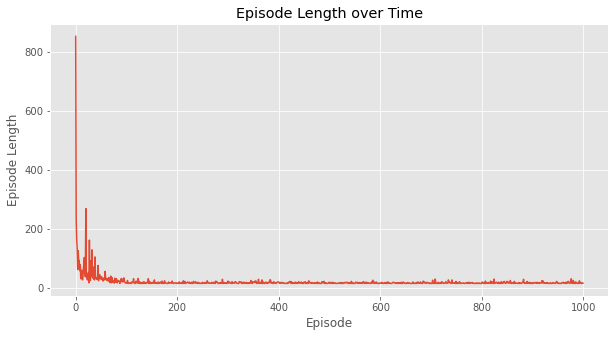

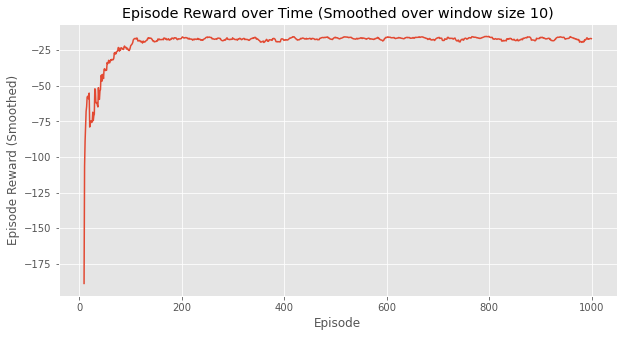

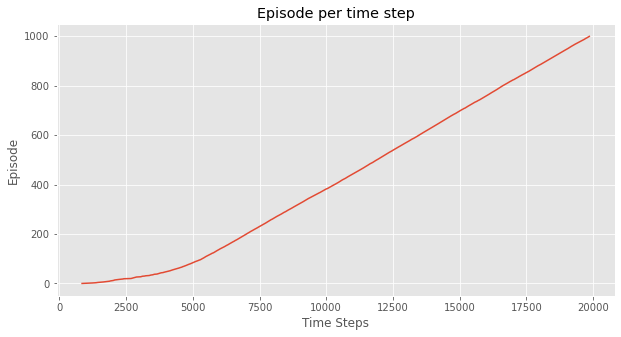

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [8]:
plotting.plot_episode_stats(stats)

#### 9. Importing the required libraries

In [9]:
import numpy as np
import pylab as pl
import networkx as nx

#### 10. Defining and visualizing the graph

In [10]:
edges = [(0, 1), (1,5), (5,6), (5,4), (1,2),
         (1,3), (9,10), (2,4), (0,6), (6,7),
         (8,9), (7,8), (1,7), (3,9)]

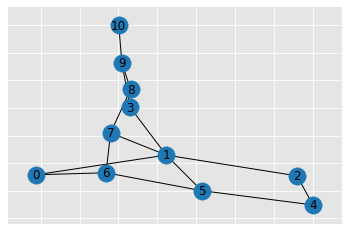

In [11]:
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

#### 11. Defining the reward the system for the bot

In [12]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
M *= - 1

for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
    
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]] = 0
        # reverse of point

M[goal, goal]=100
print(M)

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


#### 12. Defining some utility functions to be used in the training

In [13]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))

gamma = 0.75
# learning parameter
initial_state = 1

#### Determines the available action for a given state

In [14]:
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0) [1]
    return available_action

available_action = available_actions(initial_state)

#### Choose one of the available actions at random

In [15]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

#### Updating

In [16]:
def update(current_state,action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size =1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if (np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return(0)

In [17]:
update(initial_state, action, gamma)

0

#### 13. Training and evaluating the bot using the Q-Matrix

In [18]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)

Most efficient path:
[0, 1, 3, 9, 10]


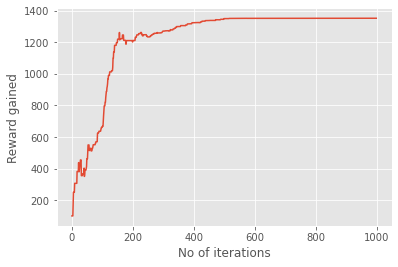

In [19]:
# Testing
current_state = 0
steps = [current_state]

while current_state != 10:

    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()

#### 14. Defining and visualizing the new graph with the environment clues

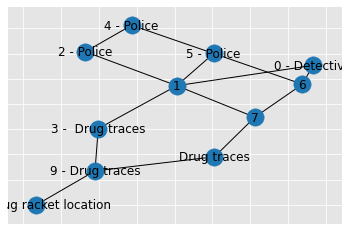

In [20]:
police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 -  Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
nx.draw_networkx_nodes(H, pos) #node_size=[200,200,200,200,200,200,200,200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()

#### 15. Defining some utility functions for the training process

In [21]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1

In [22]:
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0) [1]
    return av_action

In [23]:
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

In [24]:
def collect_environment_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)

available_action = available_actions(initial_state)
action = sample_next_action(available_actions)

In [25]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ])) [1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environment_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if(np.max(Q) > 0):
        return(np.sum(Q / np.max(Q) *100))
    else:
        return(0)
update(initial_state ,action, gamma) 

0

In [26]:
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0) [1]

    #if there are multiple routes, dis-favor anything negative
    env_pos_row = env_matrix_snap[state, av_action]

    if (np.sum(env_pos_row < 0)):
        temp_av_action = av_action[np.array(env_pos_row) [0] >= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action

#### 16. Visualizing the environmental metrics

In [27]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)

In [28]:
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

Police Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 15.  0.  0. 16.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 42.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 41.  0.  0. 41.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 33.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 28.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]

Drug traces Found
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 24.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 43.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 38.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 44.  0.]
 [ 0.  0.  0. 29.  0.  0.  

### Q-Learning Example : Self – Driving Cab

#### 17. Let’s started. We can load the game environment and render what it looks like

In [29]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



#### 18. Here’s our restructured problem statement

In [30]:
env.reset() #reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


#### 19. We can actually take our illustration above, encode its state, and give it to the environment to render in Gym.

In [31]:
# (taxi row, taxi column, passenger index, destination index)
state = env.encode(3, 1, 2, 0)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



#### 20. When the Taxi environment is created, there is an initial Reward table that’s also created, called ‘P’.

In [32]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

### SARSA (STATE-ACTION-REWARD-STATE-ACTION) ALGORITHM

#### 21. Importing the required libraries

In [33]:
import numpy as np
import gym

#### 22. Building the environment

In [34]:
#Building the environment
env = gym.make('FrozenLake-v1')

#### 23. Initializing different parameters

In [35]:
#Defining the different parameters
epsilon = 0.9
total_episodes = 10000
max_steps = 100
alpha = 0.85
gamma = 0.95

#Initializing the Q-matrix
Q = np.zeros((env.observation_space.n, env.action_space.n))

#### 24. Defining utility function to be used in the learning process

In [36]:
#Function to choose the next action
def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

#Function to learn the Q-value
def update(state, state2, reward, action, action2):
    predict = Q[state, action]
    target = reward + gamma * Q[state2, action2]
    Q[state, action] = Q[state, action] + alpha * (target - predict)

#### 25. Training the learning agent

In [37]:
#Initializing the reward
reward = 0

# Starting the SARSA learning
for episode in range(total_episodes):
    t = 0
    state1 = env.reset()
    action1 = choose_action(state1)

    while t < max_steps:
        #Visualizing the training
        env.render()

        #Getting the next state
        state2, reward, done, info = env.step(action1)

        #Choosing the next action
        action2 = choose_action(state2)

        #Learning the Q-value
        update(state1, state2, reward, action1, action2)

        state1 = state2
        action1 = action2

        #Updating the respective values
        t += 1
        reward += 1

        #If at the end of learning process
        if done:
            break



SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HF

#### 26. Evaluating the performance

In [38]:
print("Performance : ", reward/total_episodes)

#Visualizing the Q-matrix
print(Q)

Performance :  0.0001
[[1.28812320e-02 9.89101168e-03 1.39038099e-02 1.03926082e-02]
 [1.36977921e-05 5.83175369e-03 1.31178133e-07 9.53932474e-04]
 [9.01627311e-04 1.52275483e-03 2.23956574e-03 2.31893735e-03]
 [3.98388798e-04 2.52996425e-03 1.72786133e-04 1.48913140e-03]
 [2.30416242e-02 1.50502393e-01 1.65810160e-03 4.12298896e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.84934499e-01 1.55570449e-03 1.24792930e-02 1.60948380e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.50496291e-03 1.18537255e-02 3.53437072e-04 5.37901066e-02]
 [2.54036817e-02 7.05119450e-02 8.80438674e-05 1.44631082e-03]
 [1.08648346e-01 9.89534502e-02 3.86001910e-02 7.27068658e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.77989586e-02 1.50816601e-02 2.85003443e-02 4.43028426e-02]
 [3.01981608e-01 9.82401021e-01 2.53395097e-01 2.62957212e-02]
 [0.00000000e+00 0.00000000e+00 0

## Dataset Sendiri 1 (CartPole-V1)

#### 1. Importing libraries

In [39]:
import gym
import random

#### 2. Building the environment


In [40]:
env1 = gym.make('CartPole-v1')
states = env1.observation_space.shape[0]
actions = env1.action_space.n

In [41]:
actions

2

In [42]:
#Training agent

episodes = 20
for episode in range(1, episodes+1):
    state = env1.reset()
    done = False
    score = 0

    while not done:
        env1.render()
        action = random.choice([0, 1])
        n_state, reward, done, info = env1.step(action)
        score += reward
    print("Episode: {} Score:{}".format(episode, score))

Episode: 1 Score:56.0
Episode: 2 Score:22.0
Episode: 3 Score:30.0
Episode: 4 Score:29.0
Episode: 5 Score:43.0
Episode: 6 Score:12.0
Episode: 7 Score:21.0
Episode: 8 Score:16.0
Episode: 9 Score:13.0
Episode: 10 Score:43.0
Episode: 11 Score:20.0
Episode: 12 Score:71.0
Episode: 13 Score:16.0
Episode: 14 Score:9.0
Episode: 15 Score:33.0
Episode: 16 Score:17.0
Episode: 17 Score:80.0
Episode: 18 Score:20.0
Episode: 19 Score:42.0
Episode: 20 Score:11.0


In [43]:
#close the renderer
env1.close()

## Dataset Sendiri 2 (MountainCar-v0)

#### 1.Importing libraries

In [44]:
import gym
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple
from itertools import count
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

In [45]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

# if gpu wants to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### 2. Building environment

In [46]:
env1 = gym.make("MountainCar-v0")
env1.reset()
for _ in range(1000):
    env1.render()
    env1.step(env1.action_space.sample()) # Take a random action
env1.close()

In [47]:
def getHeight(x_position):
    return np.sin(3 * x_position) * .45 + .55

In [48]:
def newreward(pos):
    if (pos >= 0.5):
        return 2
    else:
        return (pos+1.2)/1.8 - 1

In [49]:
def QLearning(env1, learning, epsilon, min_eps, episodes):
    # Determine size of discreted state space
    num_states = (env1.observation_space.high - env1.observation_space.low) * np.array([10, 50])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q1 = np.random.uniform(low=-1, high=0, size=(num_states[0], num_states[1], env1.action_space.n))
    Qinit = np.copy(Q1)

    # Initialize varibles to track rewards
    rewards_list = []
    ave_reward_list = []

    # Make copy of epsilon
    eps1 = epsilon

    # Keep track of first episode
    first = episodes + 1

    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0, 0
        state = env1.reset()

        # Discretize state
        state_adj = (state - env1.observation_space.low) * np.array([10, 50])
        state_adj = np.round(state_adj, 0).astype(int)

        while not done:
            # Render environment for last few episodes
            if i >= (episodes - 5) or i < 5:
                env1.render()

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q1[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env1.action_space.n)

            # Get next state and reward
            state2, reward, done, info = env1.step(action)

            # Discretize state2
            state2_adj = (state2 - env1.observation_space.low) * np.array([10, 50])
            state2_adj = np.round(state2_adj, 0).astype(int)

            # Save to Q point
            row = np.array([state_adj[0], state_adj[1], action])

            # Allow for terminal states
            if done and state2[0] >= 0.5:
                Q1[state_adj[0], state_adj[1], action] = reward

            # Adjust Q values for current state
            else:
                delta = learning * (newreward(state2[0])) + np.max(Q1[state2_adj[0], state2_adj[1]]) - Q1[state_adj[0], state_adj[1], action]

            if state2[0] >=0.5 and i< first:
                first = i
                print('First clear on episode {}'.format(i+1))

        #update variables
        tot_reward += newreward(state2[0])
        state_adj = state2_adj

    #Decay epsilon
    if epsilon > min_eps:
        epsilon *= eps1

    # Track rewards
    rewards_list.append(tot_reward)

    if(i+1) % 100 ==0:
        ave_reward = np.mean(rewards_list)
        ave_reward_list.append(ave_reward)
        rewards_list = []

    if (i+1) % 100 == 0:
        print('Episode {} Average Reward: {}'.format(i+1, ave_reward))

    env1.close()

    return ave_reward_list, Q1, Qinit


In [50]:
# Run Q learning algorithm
env1.reset()
rewards, Qpts, Qinit = QLearning(env1, 0.2, 0.9, 0, 1000)

Episode 1000 Average Reward: -0.641153011057112


In [51]:
env1.close()

Text(0.5, 1.0, 'Average Reward vs Episodes')

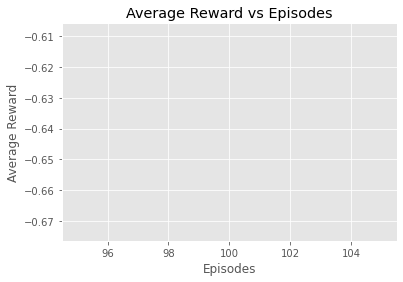

In [52]:
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Reinforcement Learning (RL) adalah salah satu pendekatan dalam pembelajaran mesin yang berfokus pada pembelajaran agen (agent) yang interaktif dengan lingkungannya. pada week ini saya menggunakan library openai GYM sebagai library dalam RL.
    - Pada environment Cartpole dengan menjalankan episode sebanyak 20, maka score terakhir pada episode 20 adalah 11.
    - Pada environment MountainCar dengan menjalankan episode sebanyak 1000, maka average scorenya adalah -0.641153011057112

---

In [53]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Christopher Darren
NIM: 		00000054804
Time-stamp:	2023-05-25 09:38:52.163171


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [54]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000054804_Christopher Darren_Week12.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000054804_Christopher Darren_Week12.ipynb to html
[NbConvertApp] Writing 5528563 bytes to IF540_Kelas EL_00000054804_Christopher Darren_Week12.html
